In [10]:
import seaborn as sns
import pandas as pd
import os
from sklearn.metrics import *
import matplotlib.pyplot as plt
import scanpy as sc


In [11]:
import palettable

method_order = [
    'Louvain','Leiden',
    'SpaGCN_without','SpaGCN_with','BayesSpace','stLearn','SEDR',
    'CCST','SCAN-IT','STAGATE','SpaceFlow','conST_nopre','BASS','DeepST'
]

cmp = palettable.tableau.Tableau_20.mpl_colors
method_color_dict = dict(zip(method_order,cmp))

In [12]:
pd_dict = {
    'replicate':[],
    'resolution':[],
    'ARI':[],
    'NMI':[],
    'algor_name':[]
}

In [13]:
method_order2=[
    # 'Louvain',
    # 'Leiden',
    'SpaGCN_without',
    'SEDR',
    'CCST',
    'STAGATE',
    'conST_nopre',
    'BASS',
    'DeepST'
    ]

In [14]:
for j in range(7):
    print(method_order2[j])
    path = f'/home/workspace2/zhaofangyuan/domain_output/osmfish_res/{method_order2[j]}'
    for file in os.listdir(path):
        file_whole = f'{path}/{file}'
        adata = sc.read_h5ad(file_whole)

        res = int(file[:-5].split('_')[-1])
        for i in range(5):
            obs_df = adata.obs.dropna()
            pred_label = obs_df[f'pred_{i+1}']
            true_label = obs_df['Region']

            # pred_label = adata.obs[f'pred_{i+1}']
            # true_label = adata.obs['Region']
            nmi = normalized_mutual_info_score(pred_label,true_label)
            ari = adjusted_rand_score(pred_label,true_label)
            
            pd_dict['replicate'].append(i)
            pd_dict['resolution'].append(res)        
            pd_dict['ARI'].append(ari)
            pd_dict['NMI'].append(nmi)
            pd_dict['algor_name'].append(method_order2[j])
        


SpaGCN_without
SEDR
CCST
STAGATE
conST_nopre
BASS
DeepST


In [15]:
pd_df = pd.DataFrame(pd_dict)

In [16]:
pd_df

,replicate,resolution,ARI,NMI,algor_name
0,0,650,0.244766,0.370065,SpaGCN_without
1,1,650,0.208477,0.337789,SpaGCN_without
2,2,650,0.254308,0.391518,SpaGCN_without
3,3,650,0.235506,0.372768,SpaGCN_without
4,4,650,0.272998,0.372444,SpaGCN_without
...,...,...,...,...,...
345,0,850,0.448787,0.581318,DeepST
346,1,850,0.448787,0.581318,DeepST
347,2,850,0.448787,0.581318,DeepST
348,3,850,0.448787,0.581318,DeepST


In [17]:
pd_df.sort_values(by="resolution" , inplace=True, ascending=True) 
pd_df

,replicate,resolution,ARI,NMI,algor_name
207,2,500,0.115572,0.166055,conST_nopre
24,4,500,0.303689,0.377704,SpaGCN_without
115,0,500,0.005744,0.034530,CCST
205,0,500,0.138747,0.189045,conST_nopre
169,4,500,0.301250,0.467331,STAGATE
...,...,...,...,...,...
326,1,950,0.478878,0.614944,DeepST
327,2,950,0.478878,0.614944,DeepST
328,3,950,0.478878,0.614944,DeepST
225,0,950,0.148492,0.278015,conST_nopre


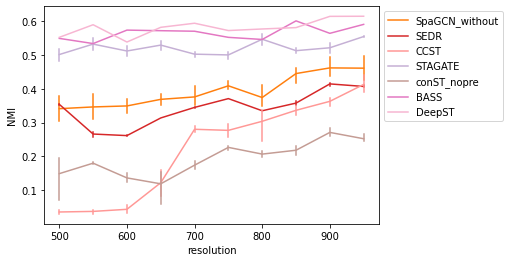

In [18]:
sns.lineplot(
    data=pd_df,
    x='resolution',
    y='NMI',
    hue="algor_name",

    palette=method_color_dict,
    hue_order=method_order,

    legend = False,
    err_style='bars')


# plt.legend(labels = ['Day1','Day2'],loc = 2, bbox_to_anchor = (1,1))
plt.legend(labels = method_order2, bbox_to_anchor = (1,1))
plt.savefig('../all_res&spa/resolution_nmi_all_regular(lineplot).pdf',dpi=400,bbox_inches='tight',transparent=True)
